### I. Classification Methods

Within supervised learning there are two classes of problems:

1. Predict a numeric output from other (possibly non-numeric) variable inputs.

2. Predict a categorical (non-numeric) output from other (possibly non-numeric) variable inputs.


As this is *linear* algebra, we have restricted ourselves to using linear models (GLMs), least squares regression specifically. Now we turn to the second type of problem: we need to specify a linear model that will predict a categorical output variable.

**Example**. Given variables ```petal.length```, ```petal.width```, ```sepal.length```, and ```sepal.width```, predict iris ```variety```: ```Setosa```, ```Veriscolor```, or ```Virginica```.

**Example**. Given variables such as ```age```, ```sex```, ```Pclass```, predict ```survived``` for a passenger on the Titanic. (See Lab 6.)

**Discussion**. How could you use a least squares regression model to predict ```variety``` or ```survived```?



### II. Logistic Regression

Logistic regression is a type of GLM that is commonly used to predict categorical variables. The central idea is to build a linear model that is then transformed to predict the probability that a variable will take a categorical value, rather than trying to directly predict the value itself:

\begin{align} p(x_1, x_2, ... , x_p) = \frac{e^{\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p}}{1 + e^{\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p}}. \end{align}

**Question.** Why is this considered a "linear" model?

**Exercise**. Suppose we are predicting how a voter will vote on an upcoming referrendum. Let ```yes``` be a 1, and ```no``` be a 0. Also suppose that $\hat{\beta_0} = -1.1$, $\hat{\beta_1} = 0.06$, $\beta_2 = -0.017$, $x_1$ = age, $x_2$ yearly income in thousands of dollars. This model predicts that a 34 year old female who makes $90,000 per year will vote ____.

In [ ]:
import numpy as np

# Define the logistic regression equation
def logistic_regression(beta_0, beta_1, beta_2, x1, x2):
    log_odds = beta_0 + beta_1*x1 + beta_2*x2
    probability = np.exp(log_odds) / (1 + np.exp(log_odds))
    return probability

# Set the values of beta and the predictor variables
beta_0_hat = -1.1
beta_1_hat = 0.06
beta_2 = -0.017
x1 = 34
x2 = 90#000

# Calculate the predicted probability using the logistic regression equation
predicted_prob = logistic_regression(beta_0_hat, beta_1_hat, beta_2, x1, x2)
print("The predicted probability of voting 'yes' is:", predicted_prob)



The predicted probability of voting 'yes' is: 0.35663485430559827


**Question**. What does $\hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2$ need to be in order for $p(x_1, x_2)$ to be 50%?

$$ p(x_1, x_2) = \frac{e^{\hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2}}{1 + e^{\hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2}} $$

Setting $p(x_1, x_2)$ to 0.5, we get:

$$ 0.5 = \frac{e^{\hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2}}{1 + e^{\hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2}} $$

Multiplying both sides by the denominator, we get:

$$ 0.5 + 0.5e^{\hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2} = e^{\hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2} $$

Taking the natural logarithm of both sides, we get:

$$ \ln(0.5 + 0.5e^{\hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2}) = \hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2 $$

So, in order for $p(x_1, x_2)$ to be 50%, $\hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2$ needs to be equal to $\ln(0.5 + 0.5e^{\hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2})$. We can use this equation to solve for the value of $\hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2$ that corresponds to a predicted probability of 50%.

Set all e's power to 0

#### Estimating the Regression Coefficients.

Rather than using least squares to fit the model, the common approach is to use *maximum likelihood*. The maximum likehood function is a result of the product rule with independence:

\begin{align} ℒ(\beta_0, \beta_1, \beta_2, ... , \beta_p) = \underset{i:y_i=1}{\Pi} p(x_1, x_2, ..., x_p) \underset{i^{\prime}:y_{i^{\prime}} = 0}{\Pi} (1-p(x_1, x_2, ..., x_p)).\end{align}

The $\hat{\beta_0}$, $\hat{\beta_1}$, ..., $\hat{\beta_p}$ that maximize this function result in the model that is the best fit for our data.

**Discussion**. Gradient Ascent/Descent for maximizing and minimizing functions. 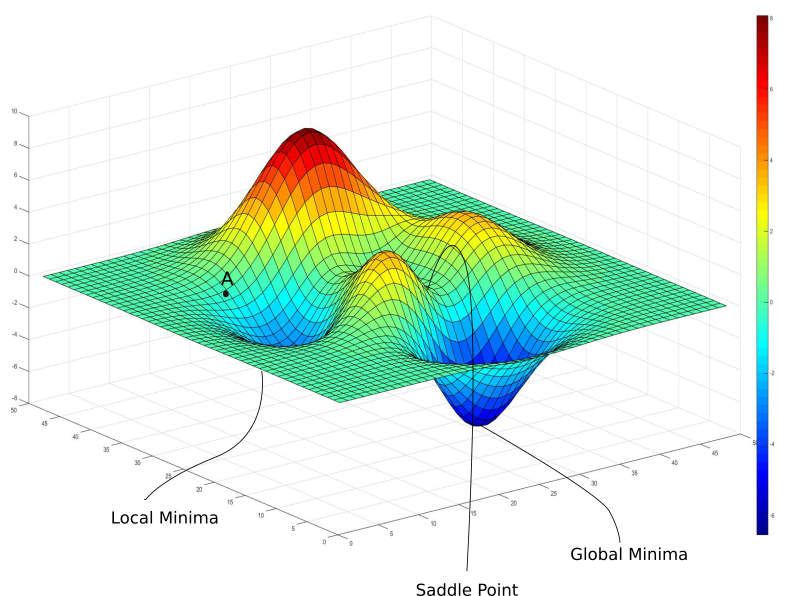

### III. Logistic Regression Model for the Babies Data Set

Let's build a logistic regression model to predict whether or not the a baby's mother smoked during pregnancy using the ```babies``` data set.

In [ ]:
# Step 1: Import babies dataset
from google.colab import files

uploaded = files.upload()

Saving babies.csv to babies.csv


In [ ]:
# Step 2: View dataset

import pandas as pd

babies = pd.read_csv("babies.csv")
babies.head()


,bwt,gestation,parity,age,height,weight,smoke
0,120,284.0,0,27.0,62.0,100.0,0.0
1,113,282.0,0,33.0,64.0,135.0,0.0
2,128,279.0,0,28.0,64.0,115.0,1.0
3,123,NaN,0,36.0,69.0,190.0,0.0
4,108,282.0,0,23.0,67.0,125.0,1.0


In [ ]:
# Step 3: Preprocess the dataset

babies = babies.dropna()
babies.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284.0,0,27.0,62.0,100.0,0.0
1,113,282.0,0,33.0,64.0,135.0,0.0
2,128,279.0,0,28.0,64.0,115.0,1.0
4,108,282.0,0,23.0,67.0,125.0,1.0
5,136,286.0,0,25.0,62.0,93.0,0.0


#### Model Specification and Fit.

Now that the data is imported and cleaned we need to:

1. Specify which linear model we're going to use to fit the data.

2. Fit the least squares model that we chose.

Let's try

\begin{align} \hat{p}(x_1, x_2, ..., x_6) = \frac{e^{\hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2 + ... + \hat{\beta_6}x_6}}{1 + e^{\hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2 + ... + \hat{\beta_6}x_6}}. \end{align}

**Question**. How is this model specification related to ```babies_model``` from the previous lecture?

In [ ]:
# Step 4: Construct the design matrix and y vector

from sklearn import preprocessing
#bwt	gestation	parity	age	height	weight	smoke x1 to x6
X = babies.to_numpy()[:,0:6]
print(X)
y = babies.to_numpy()[:,6]


scaler = preprocessing.StandardScaler() #construct the scalar object
X_std = scaler.fit_transform(X) #deploy and calculate

#y = y.astype('str')

print(X_std)

[[120. 284.   0.  27.  62. 100.]
 [113. 282.   0.  33.  64. 135.]
 [128. 279.   0.  28.  64. 115.]
 ...
 [130. 291.   0.  30.  65. 150.]
 [125. 281.   1.  21.  65. 110.]
 [117. 297.   0.  38.  65. 129.]]
[[ 0.02933697  0.30609815 -0.59637086 -0.03925456 -0.81163687 -1.37409348]
 [-0.35274108  0.18112537 -0.59637086  0.99249577 -0.01956564  0.31465154]
 [ 0.46599761 -0.0063338  -0.59637086  0.13270383 -0.01956564 -0.65034561]
 ...
 [ 0.57516277  0.74350288 -0.59637086  0.47662061  0.37646997  1.03839941]
 [ 0.30224987  0.11863898  1.67680897 -1.07100488  0.37646997 -0.8915949 ]
 [-0.13441076  1.11842122 -0.59637086  1.85228771  0.37646997  0.0251524 ]]


In [ ]:
# Step 5: Fit the logistic regression model

from sklearn.linear_model import LogisticRegression
babies_model = LogisticRegression().fit(X_std, y)

print(babies_model.coef_)
print()
print(babies_model.intercept_)


[[-0.03329958  0.00443364 -0.29372972 -0.03020948  0.0606299  -0.00552364]]

[-0.01273419]


In [ ]:
import numpy as np

mom = np.array([[50, 280, 1, 40, 60, 120]])

babies_model.predict(mom)

NameError: ignored

### IV. Evaluating Model Fit

1. Accuracy: number of predictions the model got correct divided by the total number of predictions it made.
2. Confusion matrix: a deeper look at accuracy, specifically looks false positive and false negative errors.
3. Precision: true positives/(true positives + false positives).
4. Recall: true positives/(true positives + false negatives).
5. F1-Score or Sensitivity: 2(predicion x recall)/(precision + recall).

**Exercise**. Find the accuracy, confusion matrix, and F1-Score for ```babies_model```.

In [ ]:
from sklearn import metrics

y_hat = babies_model.predict(X_std)
confusion_matrix = metrics.confusion_matrix(y,y_hat, labels = babies_model.classes_)

print(confusion_matrix)


[[199 516]
 [122 337]]


In [ ]:
from sklearn import metrics

#y_hat = babies_model.predict(X)
#confusion_matrix = metrics.confusion_matrix(y,y_hat, labels = babies_model.classes_)

#print(confusion_matrix)

[[624  91]
 [312 147]]


In [ ]:
#tn, fp, fn, tp = confusion_matrix.ravel()

tn, fp, fn, tp = confusion_matrix.ravel()
accuracy = (tp + tn)/X.shape[0]
print(accuracy)

0.4565587734241908


In [ ]:
tn, fp, fn, tp = confusion_matrix.ravel()
accuracy = (tp + tn)/X.shape[0]
print(accuracy)

precision = tp/(tp+fp)
recall = tp/(tp + fn)

f_1 = 2*precision*recall/(precision + recall)
print(f_1)

0.4565587734241908
0.513719512195122


**Exercise**. Consider a baseline "null" model that predicts ```smoke``` of 0 for any value of inputs. How does the accuracy and F1-Score of this model compare to that of ```babies_model```?

In [ ]:
num_smoked = sum(y)
print(num_smoked)

accuracy_null = (X.shape[0]-num_smoked)/X.shape[0]
print(accuracy_null)


459.0
0.6090289608177172
